C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_17936\2372427594.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_17936\2372427594.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_17936\2372427594.py:20: SettingWi

Mean Squared Error: 48719.63981167261


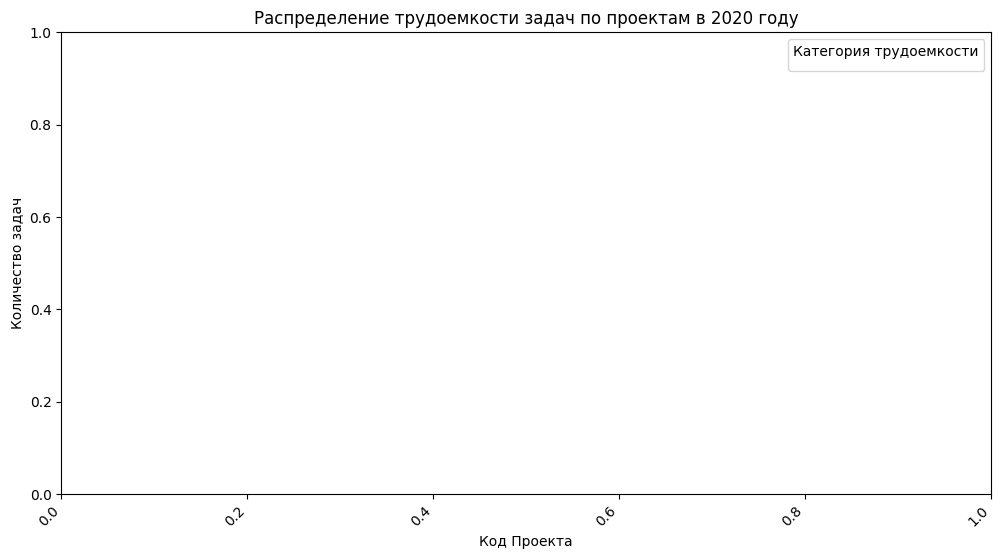

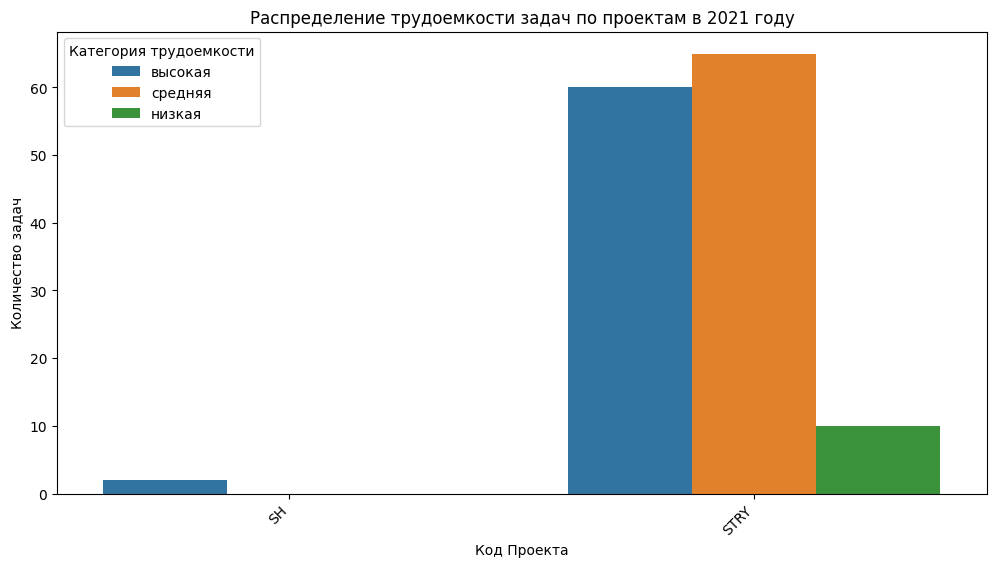

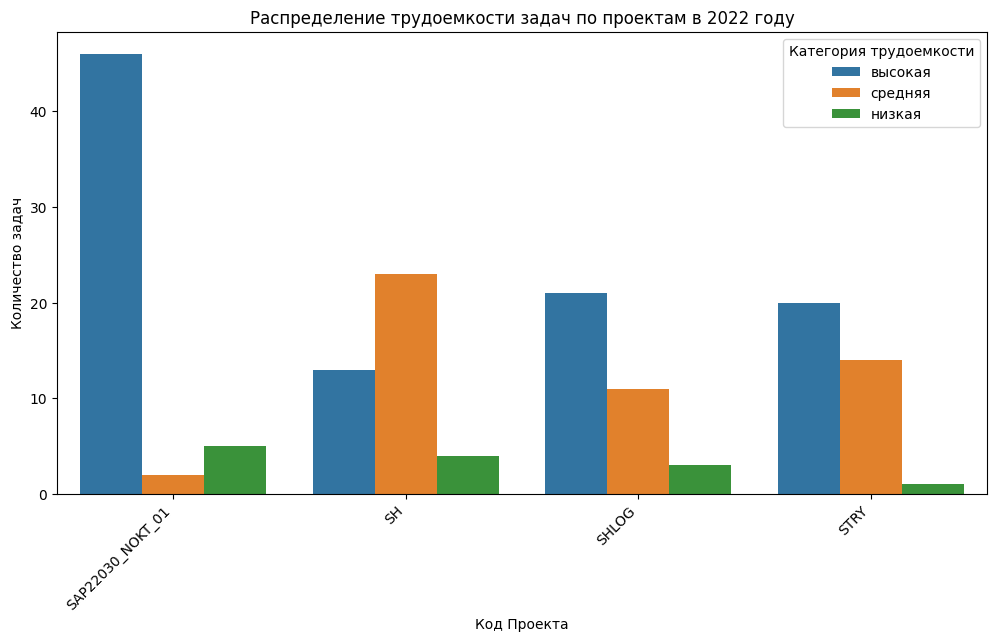

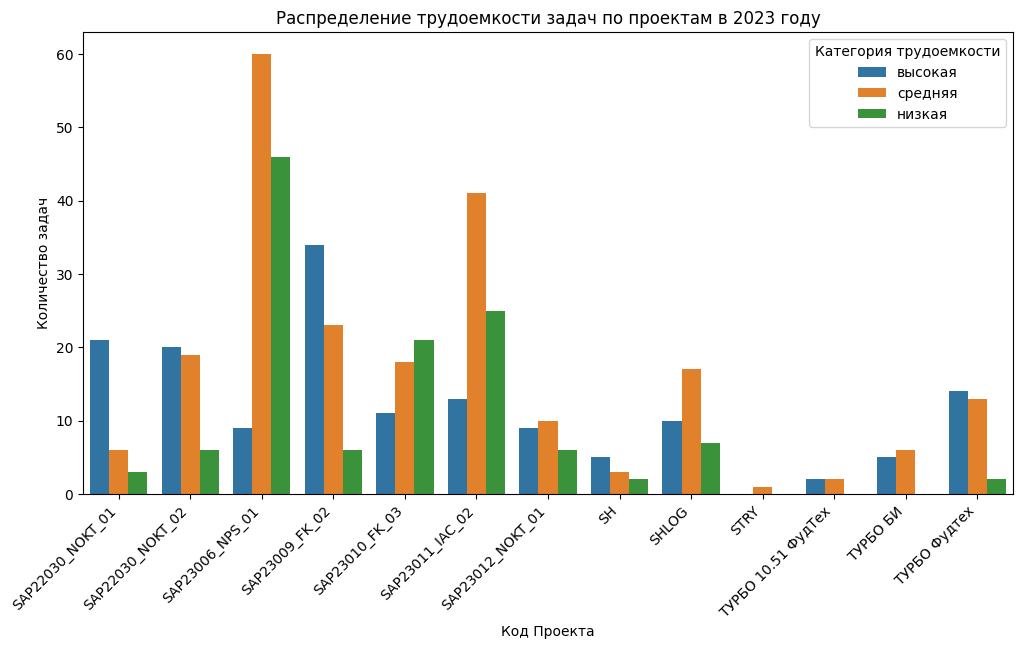

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog_with_project_code.csv')  # Укажите фактический путь к вашему файлу

# Выбираем только задачи по деятельности "Разработка"
df_development = df_timelog[df_timelog['Деятельность'] == 'Разработка']

# Преобразование столбца "час(а,ов)" в числовой формат с округлением
df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
# Заполнение пропущенных значений после преобразования в числовой формат
df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)

# Преобразование столбца 'Дата' в тип datetime с явным указанием формата даты
df_development['Дата'] = pd.to_datetime(df_development['Дата'], format='%d.%m.%Y')

# Создаем столбец с годом
df_development['Год'] = df_development['Дата'].dt.year

# Группируем данные по уникальным задачам, проектам и годам
grouped_by_project_df = df_development.groupby(['Код Проекта', 'Номер Задачи', 'Год'])['час(а,ов)'].agg(['count', 'mean']).reset_index()

# Добавляем категории трудоемкости
def categorize_workload(hours):
    if hours > 500 and hours < 1500:
        return 'высокая'
    elif hours < 200:
        return 'низкая'
    elif hours < 500 and hours > 200:
        return 'средняя'
    else:
        return

grouped_by_project_df['Категория трудоемкости'] = grouped_by_project_df['mean'].apply(categorize_workload)

# Строим график распределения трудоемкости задач для каждого года
for year in range(2020, 2024):
    # Отфильтруем данные по году
    filtered_df = grouped_by_project_df[grouped_by_project_df['Год'] == year]

    # Строим график распределения трудоемкости задач
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Код Проекта', hue='Категория трудоемкости', data=filtered_df)
    plt.title(f'Распределение трудоемкости задач по проектам в {year} году')
    plt.xlabel('Код Проекта')
    plt.ylabel('Количество задач')
    plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи оси x для лучшей видимости
    plt.legend(title='Категория трудоемкости')
        # Отображение графика
    #plt.show
    plt.savefig('категория_boxplot_by_'+str(year)+'.png', dpi=300, bbox_inches='tight')




# Выберите признаки и целевую переменную
features = ['count', 'Год']  # Пример, уточните при необходимости
target = 'mean'

# Разделите данные на обучающий и тестовый наборы
train_data, test_data = train_test_split(grouped_by_project_df, test_size=0.2, random_state=42)

# Обучите модель линейной регрессии (пример)
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Предсказание на тестовом наборе
predictions = model.predict(test_data[features])

# Оценка модели
mse = mean_squared_error(test_data[target], predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 48719.63981167261


C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_17936\915618331.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_17936\915618331.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_17936\915618331.py:21: SettingWithC

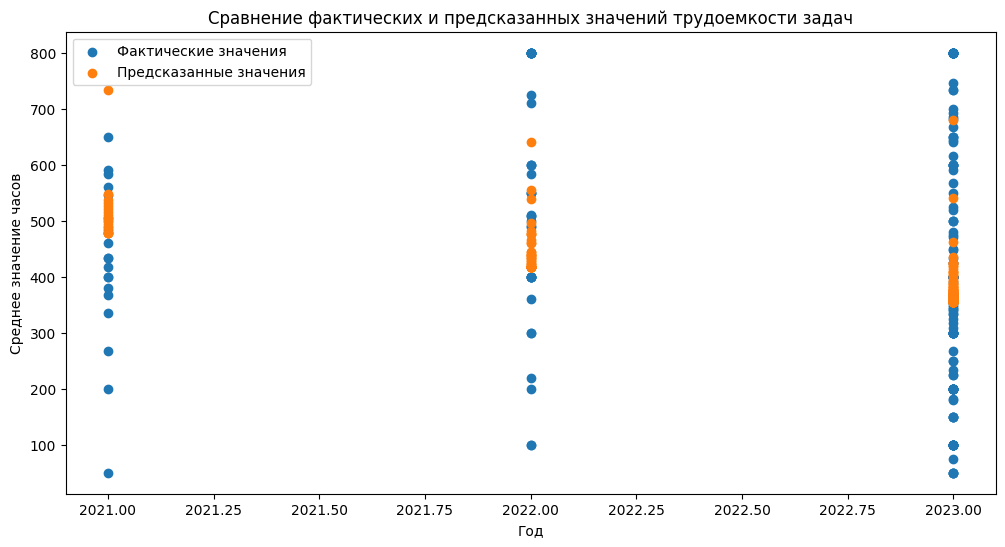

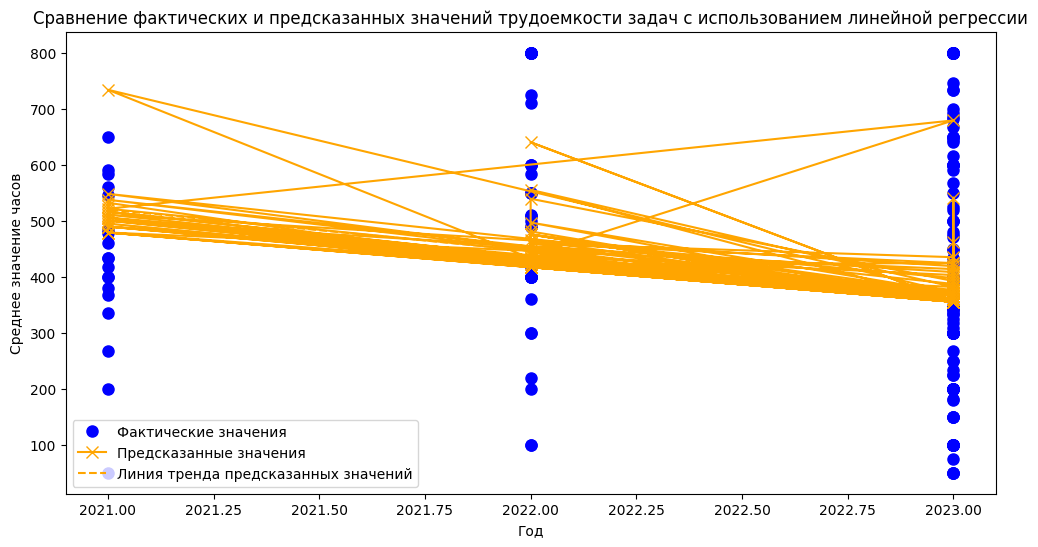

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog_with_project_code.csv')  # Укажите фактический путь к вашему файлу

# Выбираем только задачи по деятельности "Разработка"
df_development = df_timelog[df_timelog['Деятельность'] == 'Разработка']

# Преобразование столбца "час(а,ов)" в числовой формат с округлением
df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
# Заполнение пропущенных значений после преобразования в числовой формат
df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)

# Преобразование столбца 'Дата' в тип datetime с явным указанием формата даты
df_development['Дата'] = pd.to_datetime(df_development['Дата'], format='%d.%m.%Y')

# Создаем столбец с годом
df_development['Год'] = df_development['Дата'].dt.year

# Группируем данные по уникальным задачам, проектам и годам
grouped_by_project_df = df_development.groupby(['Код Проекта', 'Номер Задачи', 'Год'])['час(а,ов)'].agg(['count', 'mean']).reset_index()

# Добавляем категории трудоемкости
def categorize_workload(hours):
    if hours > 500 and hours < 1500:
        return 'высокая'
    elif hours < 200:
        return 'низкая'
    elif hours < 500 and hours > 200:
        return 'средняя'
    else:
        return

grouped_by_project_df['Категория трудоемкости'] = grouped_by_project_df['mean'].apply(categorize_workload)


# Выберите признаки и целевую переменную
features = ['count', 'Год']  # Пример, уточните при необходимости
target = 'mean'

# Разделите данные на обучающий и тестовый наборы
train_data, test_data = train_test_split(grouped_by_project_df, test_size=0.2, random_state=42)

# Обучите модель линейной регрессии (пример)
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Предсказание на тестовом наборе
predictions = model.predict(test_data[features])

# Оценка модели
mse = mean_squared_error(test_data[target], predictions)
print(f'Mean Squared Error: {mse}')

# Визуализация предсказанных значений и фактических значений
plt.figure(figsize=(12, 6))
plt.scatter(test_data['Год'], test_data[target], label='Фактические значения')
plt.scatter(test_data['Год'], predictions, label='Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений трудоемкости задач')
plt.xlabel('Год')
plt.ylabel('Среднее значение часов')
plt.legend()
plt.show()

# Визуализация предсказанных значений и фактических значений
plt.figure(figsize=(12, 6))

# График фактических значений
plt.plot(test_data['Год'], test_data[target], marker='o', linestyle='', markersize=8, label='Фактические значения', color='blue')

# График предсказанных значений
plt.plot(test_data['Год'], predictions, marker='x', linestyle='-', markersize=8, label='Предсказанные значения', color='orange')

# Линия тренда для предсказанных значений
trend_line = np.polyfit(test_data['Год'], predictions, 1)
plt.plot(test_data['Год'], np.polyval(trend_line, test_data['Год']), linestyle='--', color='orange', label='Линия тренда предсказанных значений')

plt.title('Сравнение фактических и предсказанных значений трудоемкости задач с использованием линейной регрессии')
plt.xlabel('Год')
plt.ylabel('Среднее значение часов')
plt.legend()
plt.show()


C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_2412\953292987.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_2412\953292987.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_2412\953292987.py:21: SettingWithCopy

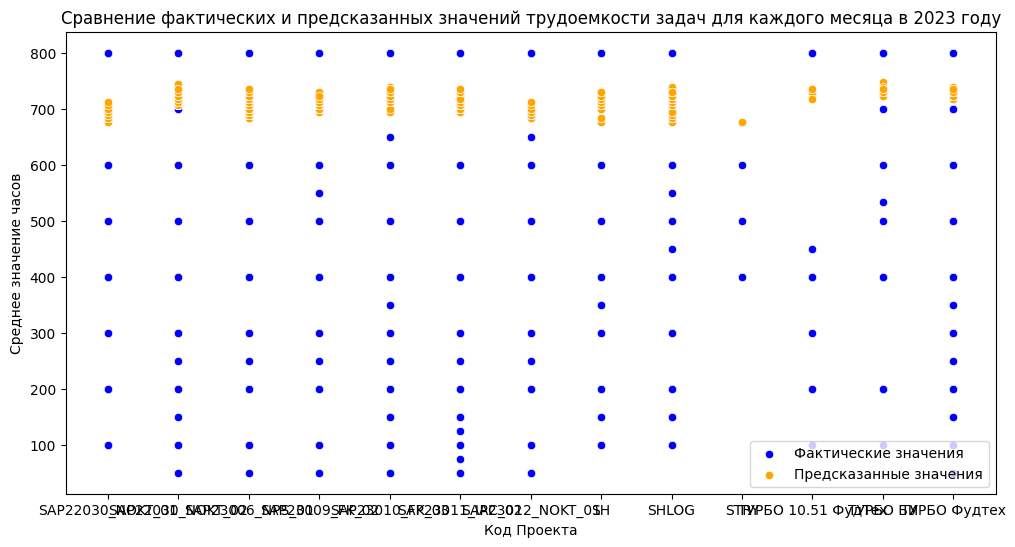

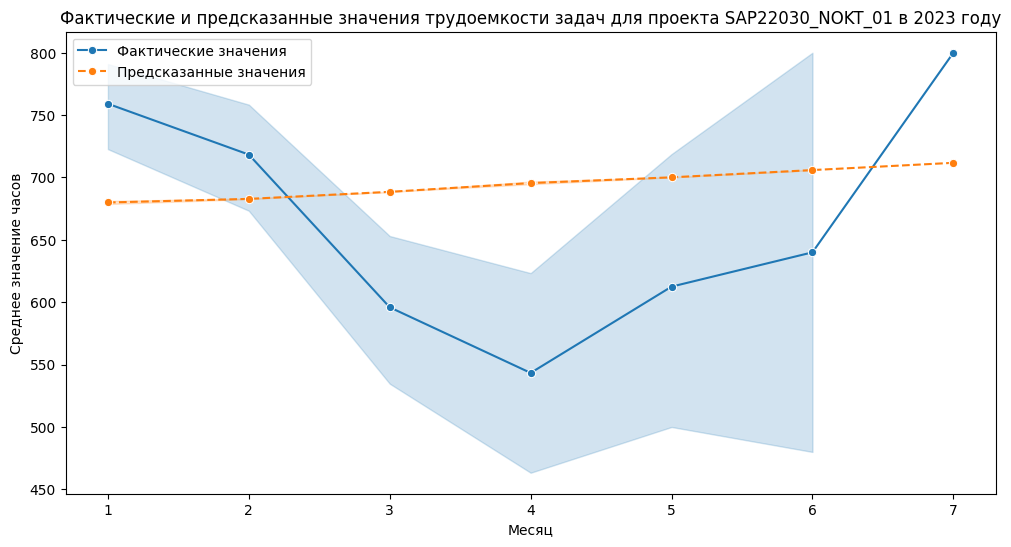

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog_with_project_code.csv')  # Укажите фактический путь к вашему файлу

# Выбираем только задачи по деятельности "Разработка"
df_development = df_timelog[df_timelog['Деятельность'] == 'Разработка']

# Преобразование столбца "час(а,ов)" в числовой формат с округлением
df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
# Заполнение пропущенных значений после преобразования в числовой формат
df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)

# Преобразование столбца 'Дата' в тип datetime с явным указанием формата даты
df_development['Дата'] = pd.to_datetime(df_development['Дата'], format='%d.%m.%Y')

# Создаем столбец с годом
df_development['Год'] = df_development['Дата'].dt.year

# Группируем данные по уникальным задачам, проектам и годам
grouped_by_project_df = df_development.groupby(['Код Проекта', 'Номер Задачи', 'Год','Дата'])['час(а,ов)'].agg(['count', 'mean']).reset_index()

# Добавляем категории трудоемкости
def categorize_workload(hours):
    if hours > 500 and hours < 1500:
        return 'высокая'
    elif hours < 200:
        return 'низкая'
    elif hours < 500 and hours > 200:
        return 'средняя'
    else:
        return

grouped_by_project_df['Категория трудоемкости'] = grouped_by_project_df['mean'].apply(categorize_workload)

# Добавляем столбец с месяцем
grouped_by_project_df['Месяц'] = grouped_by_project_df['Дата'].dt.month

# Выбираем признаки и целевую переменную
features = ['count', 'Год', 'Месяц']  # Пример, уточните при необходимости
target = 'mean'

# Разделяем данные на обучающий и тестовый наборы (2020-2022 года для обучения)
train_data = grouped_by_project_df[(grouped_by_project_df['Год'] >= 2020) & (grouped_by_project_df['Год'] < 2023)]
test_data = grouped_by_project_df[(grouped_by_project_df['Год'] == 2023)]

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Предсказываем значения для тестового набора
test_predictions = model.predict(test_data[features])

# Добавляем предсказанные значения в DataFrame
test_data['Предсказанное значение'] = test_predictions

# Визуализируем результаты
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Код Проекта', y=target, data=test_data, label='Фактические значения', color='blue')
sns.scatterplot(x='Код Проекта', y='Предсказанное значение', data=test_data, label='Предсказанные значения', color='orange')
plt.title('Сравнение фактических и предсказанных значений трудоемкости задач для каждого месяца в 2023 году')
plt.xlabel('Код Проекта')
plt.ylabel('Среднее значение часов')
plt.legend()
plt.show()

# Найдем проект с наибольшим количеством часов
top_project = test_data.loc[test_data[target].idxmax()]['Код Проекта']

# Отфильтруем данные только для этого проекта
top_project_data = test_data[test_data['Код Проекта'] == top_project]

# Визуализируем результаты с использованием линейного графика
plt.figure(figsize=(12, 6))

# Фактические значения
sns.lineplot(x='Месяц', y=target, data=top_project_data, marker='o', label='Фактические значения')

# Предсказанные значения
sns.lineplot(x='Месяц', y='Предсказанное значение', data=top_project_data, marker='o', linestyle='dashed', label='Предсказанные значения')

plt.title(f'Фактические и предсказанные значения трудоемкости задач для проекта {top_project} в 2023 году')
plt.xlabel('Месяц')
plt.ylabel('Среднее значение часов')
plt.legend()
plt.show()



C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_2412\2584880500.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_2412\2584880500.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_2412\2584880500.py:21: SettingWithC

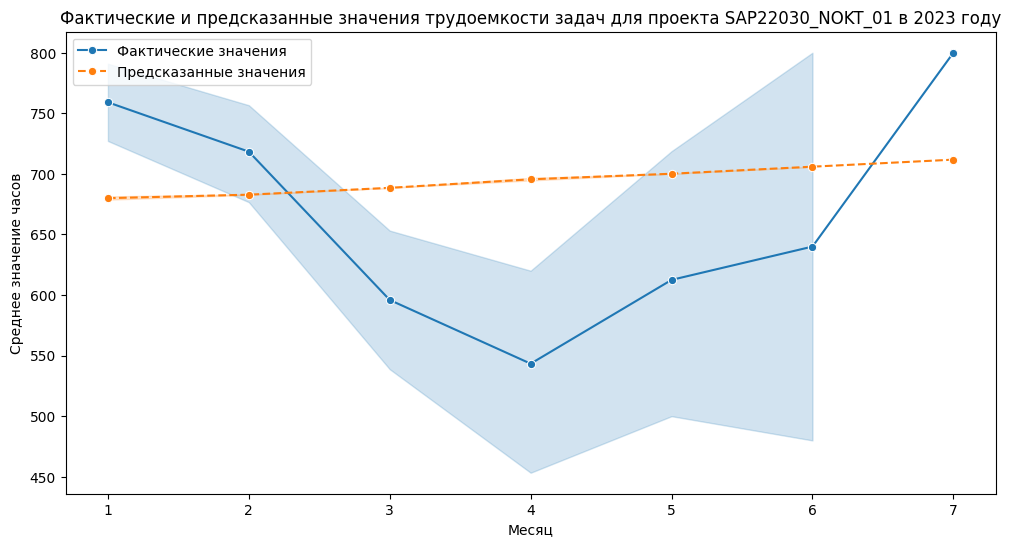

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog_with_project_code.csv')  # Укажите фактический путь к вашему файлу

# Выбираем только задачи по деятельности "Разработка"
df_development = df_timelog[df_timelog['Деятельность'] == 'Разработка']

# Преобразование столбца "час(а,ов)" в числовой формат с округлением
df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
# Заполнение пропущенных значений после преобразования в числовой формат
df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)

# Преобразование столбца 'Дата' в тип datetime с явным указанием формата даты
df_development['Дата'] = pd.to_datetime(df_development['Дата'], format='%d.%m.%Y')

# Создаем столбец с годом
df_development['Год'] = df_development['Дата'].dt.year

# Группируем данные по уникальным задачам, проектам и годам
grouped_by_project_df = df_development.groupby(['Код Проекта', 'Номер Задачи', 'Год','Дата'])['час(а,ов)'].agg(['count', 'mean']).reset_index()

# Добавляем категории трудоемкости
def categorize_workload(hours):
    if hours > 500 and hours < 1500:
        return 'высокая'
    elif hours < 200:
        return 'низкая'
    elif hours < 500 and hours > 200:
        return 'средняя'
    else:
        return

grouped_by_project_df['Категория трудоемкости'] = grouped_by_project_df['mean'].apply(categorize_workload)

# Добавляем столбец с месяцем
grouped_by_project_df['Месяц'] = grouped_by_project_df['Дата'].dt.month

# Выбираем признаки и целевую переменную
features = ['count', 'Год', 'Месяц']  # Пример, уточните при необходимости
target = 'mean'

# Разделяем данные на обучающий и тестовый наборы (2020-2022 года для обучения)
train_data = grouped_by_project_df[(grouped_by_project_df['Год'] >= 2020) & (grouped_by_project_df['Год'] < 2023)]
test_data = grouped_by_project_df[(grouped_by_project_df['Год'] == 2023)]

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Предсказываем значения для тестового набора
test_predictions = model.predict(test_data[features])

# Добавляем предсказанные значения в DataFrame
test_data['Предсказанное значение'] = test_predictions

# Найдем проект с наибольшим количеством часов
top_project = test_data.loc[test_data[target].idxmax()]['Код Проекта']

# Отфильтруем данные только для этого проекта
top_project_data = test_data[test_data['Код Проекта'] == top_project]

# Визуализируем результаты с использованием линейного графика
plt.figure(figsize=(12, 6))

# Фактические значения
sns.lineplot(x='Месяц', y=target, data=top_project_data, marker='o', label='Фактические значения')

# Предсказанные значения
sns.lineplot(x='Месяц', y='Предсказанное значение', data=top_project_data, marker='o', linestyle='dashed', label='Предсказанные значения')

plt.title(f'Фактические и предсказанные значения трудоемкости задач для проекта {top_project} в 2023 году')
plt.xlabel('Месяц')
plt.ylabel('Среднее значение часов')
plt.legend()
plt.show()

C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_2412\2313856165.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_2412\2313856165.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)
C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_2412\2313856165.py:23: SettingWithC

SVR Mean Squared Error: 97127.1395662818


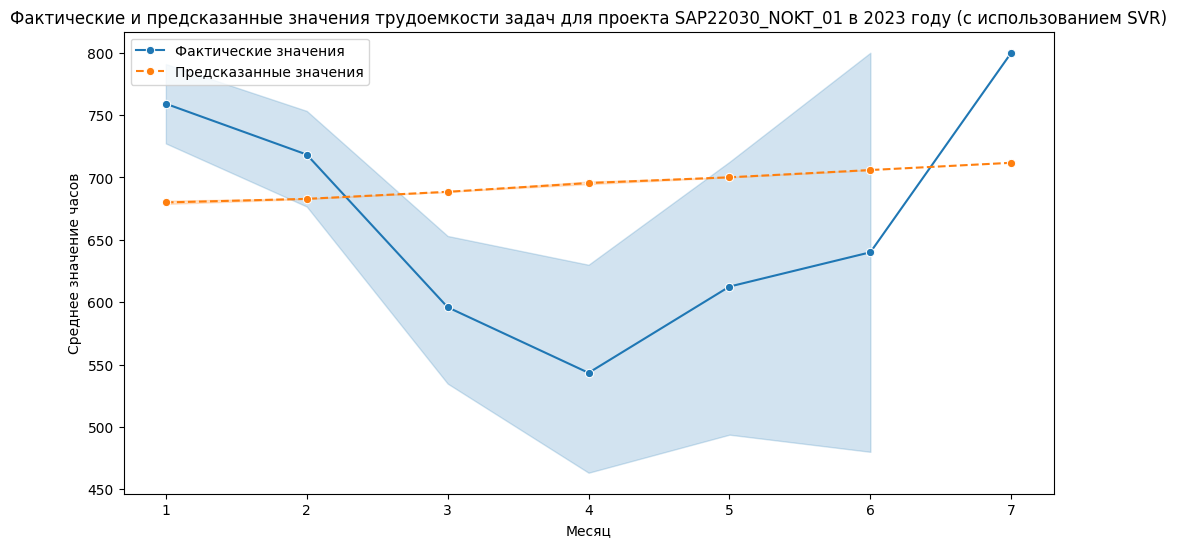

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Загрузка данных из файла timelog.csv
df_timelog = pd.read_csv('timelog_with_project_code.csv')  # Укажите фактический путь к вашему файлу

# Выбираем только задачи по деятельности "Разработка"
df_development = df_timelog[df_timelog['Деятельность'] == 'Разработка']

# Преобразование столбца "час(а,ов)" в числовой формат с округлением
df_development['час(а,ов)'] = pd.to_numeric(df_development['час(а,ов)'].str.replace(',', ''), errors='coerce').apply(round)
# Заполнение пропущенных значений после преобразования в числовой формат
df_development['час(а,ов)'] = df_development['час(а,ов)'].fillna(0)

# Преобразование столбца 'Дата' в тип datetime с явным указанием формата даты
df_development['Дата'] = pd.to_datetime(df_development['Дата'], format='%d.%m.%Y')

# Создаем столбец с годом
df_development['Год'] = df_development['Дата'].dt.year

# Группируем данные по уникальным задачам, проектам и годам
grouped_by_project_df = df_development.groupby(['Код Проекта', 'Номер Задачи', 'Год','Дата'])['час(а,ов)'].agg(['count', 'mean']).reset_index()

# Добавляем категории трудоемкости
def categorize_workload(hours):
    if hours > 500 and hours < 1500:
        return 'высокая'
    elif hours < 200:
        return 'низкая'
    elif hours < 500 and hours > 200:
        return 'средняя'
    else:
        return


grouped_by_project_df['Категория трудоемкости'] = grouped_by_project_df['mean'].apply(categorize_workload)

# Добавляем столбец с месяцем
grouped_by_project_df['Месяц'] = grouped_by_project_df['Дата'].dt.month

# Выбираем признаки и целевую переменную
features = ['count', 'Год', 'Месяц']  # Пример, уточните при необходимости
target = 'mean'
# Преобразуем признаки для использования SVR
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_data[features])
scaled_test_features = scaler.transform(test_data[features])

# Обучаем модель SVR
svr_model = SVR()
svr_model.fit(scaled_train_features, train_data[target])

# Предсказание на тестовом наборе
svr_predictions = svr_model.predict(scaled_test_features)

# Оценка модели SVR
svr_mse = mean_squared_error(test_data[target], svr_predictions)
print(f'SVR Mean Squared Error: {svr_mse}')

# Предсказание трудоемкости проектов на 2024 с использованием SVR
# ... (добавьте соответствующий код)

# Визуализация результатов с использованием SVR
plt.figure(figsize=(12, 6))

# Фактические значения
sns.lineplot(x='Месяц', y=target, data=top_project_data, marker='o', label='Фактические значения')

# Предсказанные значения с использованием SVR
sns.lineplot(x='Месяц', y='Предсказанное значение', data=top_project_data, marker='o', linestyle='dashed', label='Предсказанные значения')

plt.title(f'Фактические и предсказанные значения трудоемкости задач для проекта {top_project} в 2023 году (с использованием SVR)')
plt.xlabel('Месяц')
plt.ylabel('Среднее значение часов')
plt.legend()
plt.show()
